In [1]:
import matplotlib.pyplot as plt
import mne
import numpy as np
from scipy.stats import ttest_rel
# from braindecode.datasets import MOABBDataset

from moabb.datasets import MAMEM1

In [2]:
# dataset = MOABBDataset(dataset_name="Nakanishi2015", subject_ids=[1])

<!-- fname = C:\Users\Sunsun\mne_data\MNE-nakanishi-data\mnakanishi\12JFPM_SSVEP\raw\master\data\s1.mat -->

In [3]:
dataset = MAMEM1()

subject =[7]

dataset.subject_list = subject

In [4]:
dataset

In [5]:
sessions = dataset.get_data(subjects=subject)

In [6]:
session_name = "session_0"
run_name = "run_0"
raw_list = [sessions[id][session_name][run_name] for id in sessions]

raw = mne.concatenate_raws(raw_list)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


c:\Users\Sunsun\.virtualenvs\HybridSpeller-q8UBACmb\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


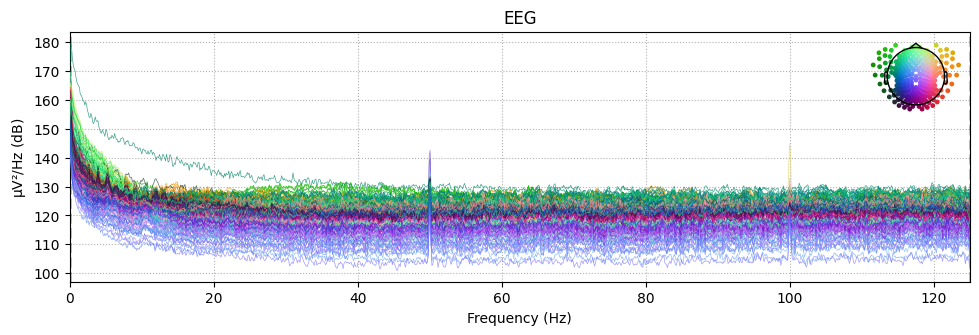

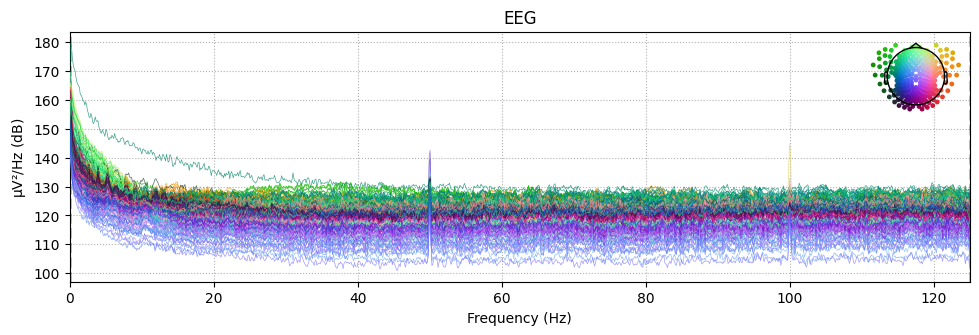

In [7]:
raw.plot_psd()

In [8]:
mne.find_events(raw)

23 events found
Event IDs: [1 2 3 4 5]


array([[ 25671,      0,      2],
       [ 28194,      0,      1],
       [ 30692,      0,      4],
       [ 33181,      0,      5],
       [ 35675,      0,      1],
       [ 38206,      0,      3],
       [ 40695,      0,      5],
       [ 43189,      0,      2],
       [ 50673,      0,      1],
       [ 53209,      0,      1],
       [ 55706,      0,      1],
       [ 65714,      0,      2],
       [ 68203,      0,      2],
       [ 70693,      0,      2],
       [ 80696,      0,      3],
       [ 83194,      0,      3],
       [ 85687,      0,      3],
       [ 95695,      0,      4],
       [ 98180,      0,      4],
       [100694,      0,      4],
       [110698,      0,      5],
       [113191,      0,      5],
       [115689,      0,      5]], dtype=int64)

In [9]:
# Load raw data
# data_path = mne.datasets.ssvep.data_path()
# data_path = moabb.datasets.Nakanishi2015.data_path(subject = 1)

# bids_fname = (data_path)

# raw = mne.io.read_raw_brainvision(bids_fname, preload=True, verbose=False)
raw.info['line_freq'] = 60.

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)

# Set common average reference
raw.set_eeg_reference('average', projection=False, verbose=False)

# Apply bandpass filter
raw.filter(l_freq=0.1, h_freq=None, fir_design='firwin', verbose=False)

# Construct epochs
event_id = {
    '6.66hz': 1
}
# events, _ = mne.events_from_annotations(raw, verbose=False)
events = mne.find_events(raw)
tmin, tmax = -1., 4.  # in s
baseline = None
epochs = mne.Epochs(
    raw, events=events,
    event_id=[event_id['6.66hz']], tmin=tmin,
    tmax=tmax, baseline=baseline, verbose=False)

ValueError: DigMontage is only a subset of info. There are 256 channel positions not present in the DigMontage. The required channels are:

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128', 'E129', 'E130', 'E131', 'E132', 'E133', 'E134', 'E135', 'E136', 'E137', 'E138', 'E139', 'E140', 'E141', 'E142', 'E143', 'E144', 'E145', 'E146', 'E147', 'E148', 'E149', 'E150', 'E151', 'E152', 'E153', 'E154', 'E155', 'E156', 'E157', 'E158', 'E159', 'E160', 'E161', 'E162', 'E163', 'E164', 'E165', 'E166', 'E167', 'E168', 'E169', 'E170', 'E171', 'E172', 'E173', 'E174', 'E175', 'E176', 'E177', 'E178', 'E179', 'E180', 'E181', 'E182', 'E183', 'E184', 'E185', 'E186', 'E187', 'E188', 'E189', 'E190', 'E191', 'E192', 'E193', 'E194', 'E195', 'E196', 'E197', 'E198', 'E199', 'E200', 'E201', 'E202', 'E203', 'E204', 'E205', 'E206', 'E207', 'E208', 'E209', 'E210', 'E211', 'E212', 'E213', 'E214', 'E215', 'E216', 'E217', 'E218', 'E219', 'E220', 'E221', 'E222', 'E223', 'E224', 'E225', 'E226', 'E227', 'E228', 'E229', 'E230', 'E231', 'E232', 'E233', 'E234', 'E235', 'E236', 'E237', 'E238', 'E239', 'E240', 'E241', 'E242', 'E243', 'E244', 'E245', 'E246', 'E247', 'E248', 'E249', 'E250', 'E251', 'E252', 'E253', 'E254', 'E255', 'E256'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [ ]:
tmin = 1.
tmax = 4.
fmin = 1.
fmax = 90.
sfreq = epochs.info['sfreq']

spectrum = epochs.compute_psd(
    'welch',
    n_fft=int(sfreq * (tmax - tmin)),
    n_overlap=0, n_per_seg=None,
    tmin=tmin, tmax=tmax,
    fmin=fmin, fmax=fmax,
    window='boxcar',
    verbose=False)
psds, freqs = spectrum.get_data(return_freqs=True)

In [ ]:
def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate((
        np.ones(noise_n_neighbor_freqs),
        np.zeros(2 * noise_skip_neighbor_freqs + 1),
        np.ones(noise_n_neighbor_freqs)))
    averaging_kernel /= averaging_kernel.sum()

    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode='valid'),
        axis=-1, arr=psd
    )

    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(
        mean_noise, pad_width=pad_width, constant_values=np.nan
    )

    return psd / mean_noise

In [ ]:
snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3,
                    noise_skip_neighbor_freqs=1)

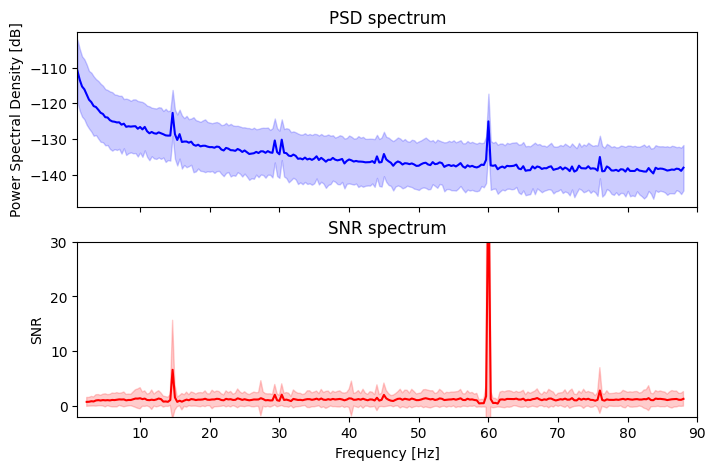

In [ ]:
fig, axes = plt.subplots(2, 1, sharex='all', sharey='none', figsize=(8, 5))
freq_range = range(np.where(np.floor(freqs) == 1.)[0][0],
                   np.where(np.ceil(freqs) == fmax - 1)[0][0])

psds_plot = 10 * np.log10(psds)
psds_mean = psds_plot.mean(axis=(0, 1))[freq_range]
psds_std = psds_plot.std(axis=(0, 1))[freq_range]
axes[0].plot(freqs[freq_range], psds_mean, color='b')
axes[0].fill_between(
    freqs[freq_range], psds_mean - psds_std, psds_mean + psds_std,
    color='b', alpha=.2)
axes[0].set(title="PSD spectrum", ylabel='Power Spectral Density [dB]')

# SNR spectrum
snr_mean = snrs.mean(axis=(0, 1))[freq_range]
snr_std = snrs.std(axis=(0, 1))[freq_range]

axes[1].plot(freqs[freq_range], snr_mean, color='r')
axes[1].fill_between(
    freqs[freq_range], snr_mean - snr_std, snr_mean + snr_std,
    color='r', alpha=.2)
axes[1].set(
    title="SNR spectrum", xlabel='Frequency [Hz]',
    ylabel='SNR', ylim=[-2, 30], xlim=[fmin, fmax])
fig